In [1]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
import cv2

In [2]:
# Read the grayscale medical image into a 2D array
def read_medical_image(image_path):
    try:
        image = Image.open(image_path).convert('L')
        image_array = np.array(image)
        return image_array
    except Exception as e:
        return None


In [3]:
# Use the 1D standard logistic map as a random key generator
def logistic_map(mu, x):
    return mu * x * (1 - x)

In [4]:
def generate_random_key(initial_condition, control_parameter, size):
    key = []
    x = initial_condition
    for _ in range(size):
        x = logistic_map(control_parameter, x)
        key.append(x)
    return key

In [5]:
# Confuse the pixel positions 
def confuse_pixels(image_array, random_key):
    height, width = image_array.shape
    flattened_image = image_array.flatten()
    pixel_order = np.argsort(random_key)
    return flattened_image[pixel_order].reshape(height, width)

In [6]:
#  Diffuse the pixels 
def diffuse_pixels(image_array, random_key):
    bit=2**32
    height, width = image_array.shape
    flattened_image = image_array.flatten()
    diffused_image = np.zeros_like(flattened_image)
    for i, pixel in enumerate(flattened_image):
        diffused_image[i] = (pixel + int(random_key[i]*bit)) % 256
    return diffused_image.reshape(height, width)



In [7]:
# Main function to encryption

def encrypt_image(image_path, initial_condition, control_parameter):
    # Step 1: Read the image
    image_array = read_medical_image(image_path)
    if image_array is None:
        return None
    #print(image_array)

    # Step 2: Generate the random key
    random_key = generate_random_key(initial_condition, control_parameter, image_array.size)
    print(random_key[0:5])
    #print(image_array.size)
    #print(len(random_key))
    

    # Step 3: Confuse pixel positions
    confused_image = confuse_pixels(image_array, random_key)
    #print(confused_image)

    # Step 4: Diffuse pixel values
    encrypted_image = diffuse_pixels(confused_image, random_key)
    #print(encrypted_image)

    return encrypted_image

In [8]:

image_path = "images/lungs.jpg"  # path of image to be encrypted
initial_condition = 0.4
control_parameter = 3.87
encrypted_image = encrypt_image(image_path, initial_condition, control_parameter)


[0.9288, 0.25592526720000014, 0.7369545210093156, 0.7502093877464614, 0.7252196650373034]


In [9]:
if encrypted_image is not None:
    # Save the encrypted image
    encrypted_image = Image.fromarray(encrypted_image)
    encrypted_image.save("Encrypted_image.jpg")
    print("Image encryption complete.")
else:
    print("Failed to encrypt the image.")

Image encryption complete.


In [10]:
encrypted_image = Image.open("Encrypted_image.jpg")
encrypted_image.show()

In [92]:
# encrypted_image = "Encrypted_image.jpg"

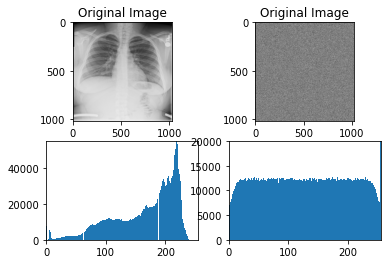

In [93]:
# image = cv2.imread(image_path)
# img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# plt.subplot(2, 2, 1)
# plt.imshow(img_rgb)
# plt.title("Original Image")

# encry_img = cv2.imread(encrypted_image)
# ency_rgb = cv2.cvtColor(encry_img, cv2.COLOR_BGR2RGB)
# plt.subplot(2, 2, 2)
# plt.imshow(ency_rgb)
# plt.title("Original Image")


# plt.subplot(2, 2, 3)
# plt.hist(image.ravel(), bins=256)
# plt.xlim(0, 255)  
# plt.ylim(0, 55000)

# plt.subplot(2, 2, 4)
# plt.hist(encry_img.ravel(), bins=256)
# plt.xlim(0, 255)  
# plt.ylim(0, 20000)

# plt.show()